
# Задание 1. Команда Iron Insruments


In [139]:
import pandas as pd
dfl = pd.read_csv('DataFromWebPage (1).csv', sep = ';', low_memory=False)

In [ ]:
# Поиск чисел в строке

In [140]:
def find_number(data_list):
    out = []
    res = ''
    for x in data_list:
        if x != x:
            res = '0'
        elif x == '':
            res = '0'
        else:
            for i in str(x):
                if ('0' <= i <= '9'):
                    res += i
        if res == '':
            res = '0'
        out.append(int(res))
        res = ''
    return out
        

In [ ]:
# Очистка данных

In [141]:
dfc = dfl
labels = ['Price', 'OtMetro', 'Vmestimost', 'Area', 'Footprint']
in_list  = []
out_list = []
for label in labels:
    in_list  = dfl[label].values
    out_list = find_number(in_list)
    n = 0
    for x in out_list:
        dfc[label].values[n] = x
        n+=1 
    in_list  = []
    out_list = []

## Визуализация

In [142]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode ( connected = True )
MAX = 10

### График распределения лофтов по цене (первые 10 с самой низкой ценой аренды за час)

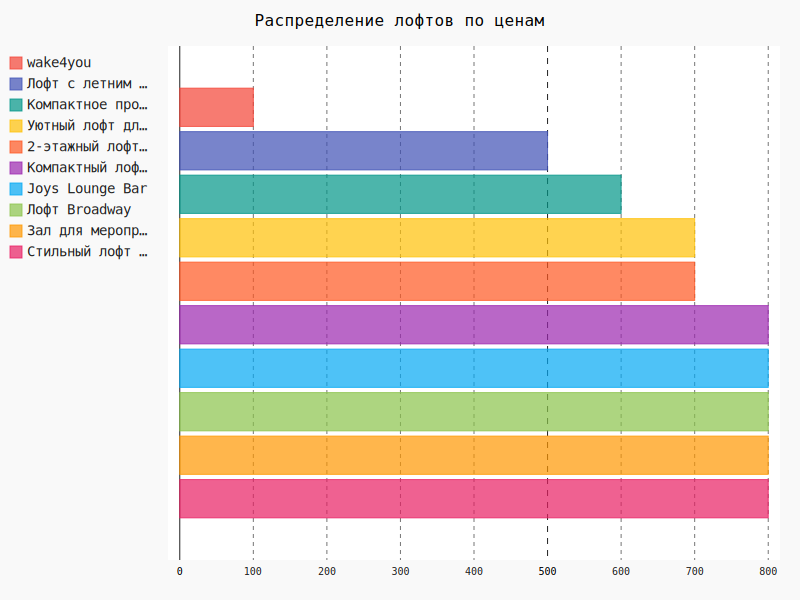

In [143]:
df_price = dfc[['Price', 'Name']]
df_price = df_price[df_price.Price != 0]
df_price = df_price.sort_values(by='Price')

import pygal
line_chart = pygal.HorizontalBar()
line_chart.title = 'Распределение лофтов по ценам'
for i in list(range(MAX)):
    line_chart.add(df_price['Name'].values[i], df_price['Price'].values[i])    
#line_chart.render()
from IPython.display import SVG
display(SVG(line_chart.render()))
#SVG.show(line_chart.render())

### Время, за которое можно пешком добраться до лофта от метро

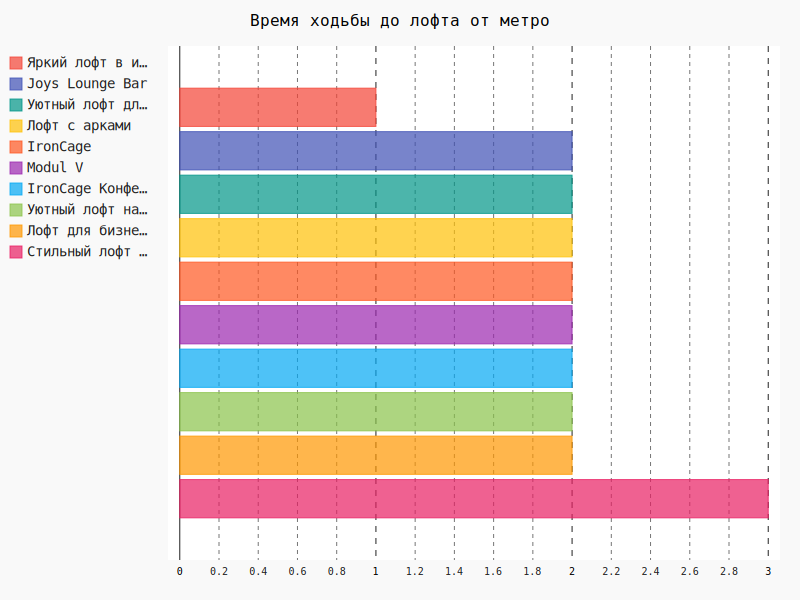

In [162]:
df_otmetro = dfc[['Name', 'OtMetro']]
df_otmetro = df_otmetro[df_otmetro.OtMetro != 0]
df_otmetro = df_otmetro.sort_values(by='OtMetro')

import pygal
line_chart = pygal.HorizontalBar()
line_chart.title = 'Время ходьбы до лофта от метро'
for i in list(range(MAX)):
    line_chart.add(df_otmetro['Name'].values[i], df_otmetro['OtMetro'].values[i])    
#line_chart.render()
from IPython.display import SVG
display(SVG(line_chart.render()))
#SVG.show(line_chart.render())

### Распределение по вместительности лофтов

In [240]:
df_vmest = dfc[['Name', 'Vmestimost']]
df_vmest = df_vmest[df_vmest.Vmestimost != 0]
df_vmest = df_vmest.sort_values(by='Vmestimost', ascending=False)


data = go.Bar(x=df_vmest['Name'].values[:MAX], y=df_vmest['Vmestimost'].values[:MAX])
layout = {'title': 'Вместительность'}
fig = go.Figure(data=[data], layout=layout)
iplot(fig)

### Распределение по максимальной площади лофта

In [241]:
df_area = dfc[['Name', 'Area']]
df_area = df_area[df_area.Area != 0]
df_area = df_area.sort_values(by='Area', ascending=False)


data = go.Pie(labels=df_vmest['Name'].values[:MAX], values=df_area['Area'].values[:MAX])
layout = {'title': 'Распределение по площади'}
fig = go.Figure(data=[data], layout=layout)
iplot(fig)

### Количество мест для сидения в лофте

In [242]:
df_foot = dfc[['Name', 'Footprint']]
df_foot = df_foot[df_foot.Footprint != 0]
df_foot = df_foot.sort_values(by='Footprint', ascending=False)


data = go.Pie(labels=df_vmest['Name'].values[:MAX], values=df_foot['Footprint'].values[:MAX])
layout = {'title': 'Востребованность языков программирования среди работодателей'}
fig = go.Figure(data=[data], layout=layout)
iplot(fig)

### Выбор оптимального лофта

In [266]:
d = dict()
for name in dfl['Name']:
    d[name] = 0

names = df_price['Name'].tolist()
names.reverse()
i = 0
for name in names:
    d[name] = d[name] + 0.1

names = df_otmetro['Name'].tolist()
names.reverse()
i = 0
for name in names:
    d[name] = d[name] + 1

    
names = df_vmest['Name'].tolist()
names.reverse()
i = 0
for name in names:
    d[name] = d[name] + 3

    
names = df_area['Name'].tolist()
names.reverse()
i = 0
for name in names:
    d[name] = d[name] + 3

names = df_foot['Name'].tolist()
names.reverse()
i = 0
for name in names:
    d[name] = d[name] + 0.5

In [267]:
max_mark = max(d.values())
print(max_mark)
for k in d.keys():
    if d[k] == max_mark:
        lider = k
print(lider)

7.6
Уютное пространство для детских мероприятий


In [268]:
lider_index = dfl['Name'].tolist().index(lider)
print(lider_index)

28


In [269]:
dd = dfl.loc[dfl['Name'].str.find(k) != -1]
dd.head()

,Price,Metro,Name,Vmestimost,Area,Footprint,OtMetro
28,2000,Академическая,Уютное пространство для детских мероприятий,30,502,30,15


In [261]:
print(d)

{'Лофт для тренингов и стратегических сессий': 310.5, 'Лофт Broadway': 320.0, 'АРТ-пространство для веселых праздников и креативных мероприятий': 575.5, 'Уютная студия на Первомайской': 242.0, 'Mira Deluxe': 585.0, 'Двухуровневый лофт с баром': 415.5, 'Уютный лофт на Электрозаводе': 470.5, 'Большой лофт для масштабных мероприятий': 665.5, 'Студия-мастерская': 124.0, 'Лофт Air': 175.5, 'Лофт с летним настроением': 316.0, 'Лофт для работы и мероприятий в историческом центре Москвы': 603.5, 'Яркий лофт для детских праздников и дружеских встреч': 413.0, 'Стильный лофт в светлых тонах': 623.5, 'Joys Lounge Bar': 453.0, 'Лофт в старинном здании у парка Сокольники': 487.0, 'Зал «Лекториум» в харизматичном гриль-пабе': 331.5, 'Белый зал': 269.5, 'Лофт для лучших событий': 417.5, 'Аквазона&Циклорама': 325.0, 'Уютное лофт-пространство на Бауманской': 559.5, 'Модный лофт с баром на Чистых Прудах': 559.5, 'Просторный пентхаус для деловых встреч и отдыха': 511.5, 'Площадка на открытом воздухе с бас

In [270]:
d.values

<function dict.values>

In [271]:
print(d.values())

dict_values([7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.1, 7.1, 7.6, 7.6, 7.6, 7.1, 7.6, 7.1, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.1, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 0, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.1, 7.6, 7.6, 7.6, 7.1, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 4.1, 7.6, 7.6, 7.6, 4.1, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6])
